In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
plt.rcParams['font.family'] = "MS Gothic"

$ e^{\pi i}= -1 $

$ \sqrt{3} $

In [3]:
math.fabs(-10)

10.0

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a + b

array([5, 7, 9])

In [9]:
DATA_DIR = "./data"

In [15]:
fpath = os.path.join(DATA_DIR, "SAMPLE1.xlsx")
df = pd.read_excel(fpath, sheet_name="Sheet5", index_col=0)
df

,a,b,c
x,1,4,7
y,2,5,8
z,3,6,9


In [18]:
fpath = os.path.join(DATA_DIR, "SAMPLE1.csv")
df = pd.read_csv(fpath)
df

,a,b,c
0,apple,10.1,4.23
1,orange,21.1,10.21
2,lemon,9.3,48.33
3,peach,77.7,90.64
4,strawberry,90.1,34.27


In [20]:
fpath = os.path.join(DATA_DIR, "SAMPLE2.xlsx")
df = pd.read_excel(fpath, sheet_name="Sheet1", index_col=0)
df.head()

,a,b,c
x1,1,10,100
x2,2,20,200
x3,3,30,300
x4,4,40,400
x5,5,50,500


In [21]:
df.mean()

a      5.5
b     55.0
c    550.0
dtype: float64

In [22]:
df.median()

a      5.5
b     55.0
c    550.0
dtype: float64

In [23]:
df.var()

a        9.166667
b      916.666667
c    91666.666667
dtype: float64

In [24]:
df.std()

a      3.027650
b     30.276504
c    302.765035
dtype: float64

In [25]:
df.describe()

,a,b,c
count,10.00000,10.000000,10.000000
mean,5.50000,55.000000,550.000000
std,3.02765,30.276504,302.765035
min,1.00000,10.000000,100.000000
25%,3.25000,32.500000,325.000000
50%,5.50000,55.000000,550.000000
75%,7.75000,77.500000,775.000000
max,10.00000,100.000000,1000.000000


In [26]:
fpath = os.path.join(DATA_DIR, "GROUP.xlsx")
df = pd.read_excel(fpath)
df.head()

,store,month,visitors,income
0,Tokyo,Jan,687,1890
1,Tokyo,Feb,694,2330
2,Tokyo,Mar,300,1723
3,Tokyo,Apr,584,2900
4,Tokyo,May,623,2259


In [34]:
df.groupby("store")[["visitors", "income"]].mean()

,visitors,income
store,,
London,629.750000,1749.916667
Newyork,543.083333,1948.000000
Tokyo,576.916667,2063.416667


In [39]:
fpath = os.path.join(DATA_DIR, "GRAPH.xlsx")
df = pd.read_excel(fpath, sheet_name="hist")
df.head()

,A,B
0,1026.709938,599.581485
1,935.907704,590.357328
2,996.391887,821.000705
3,1020.406424,238.664154
4,993.831216,325.597520


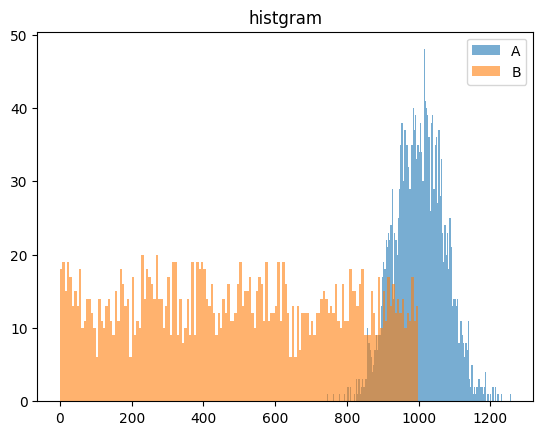

In [49]:
plt.hist(df["A"], alpha=0.6, bins=150, label="A")
plt.hist(df["B"], alpha=0.6, bins=150, label="B")
plt.title("histgram")
plt.legend()
plt.show()

In [51]:
fpath = os.path.join(DATA_DIR, "GRAPH.xlsx")
df = pd.read_excel(fpath, sheet_name="bar", index_col=0)
df.head()

,ShopA,ShopB,ShopC
Apr,8.892347,77.000000,27
May,13.000000,94.000000,36
Jun,15.000000,69.000000,25
Jul,22.208967,81.964074,47
Aug,35.000000,58.231601,26


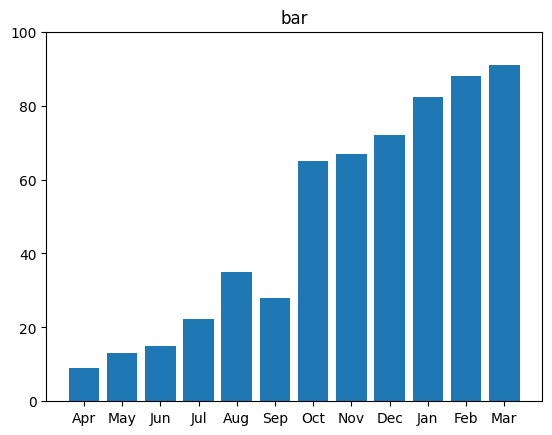

In [59]:
plt.bar(df.index, df["ShopA"])
plt.title("bar")
plt.ylim(0, 100)
plt.show()

In [60]:
fpath = os.path.join(DATA_DIR, "GRAPH.xlsx")
df = pd.read_excel(fpath, sheet_name="scat", index_col=0)
df.head()

,Visitors,Sales
Apr,1314,534.0
May,1145,445.0
Jun,1353,712.0
Jul,1041,356.0
Aug,982,178.0


In [83]:
plt.scatter(df["Visitors"], df["Sales"], alpha=0.6, c="pink", s=100, edgecolors="red", linewidths=2, marker="o")
plt.xlabel("Number of Customers")
plt.ylabel("$")
plt.show()

KeyError: 'Visitors'

In [66]:
fpath = os.path.join(DATA_DIR, "GRAPH.xlsx")
df = pd.read_excel(fpath, sheet_name="box", index_col=0)
df.head()

,ShopA,ShopB,ShopC
Apr,70.400091,37.605776,27.381852
May,6.528725,33.582959,88.682464
Jun,65.160243,76.292026,52.944295
Jul,56.072003,83.559246,60.525923
Aug,27.705278,6.448095,62.344162


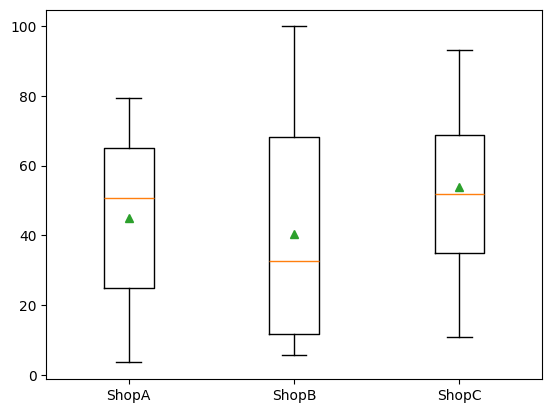

In [81]:
plt.boxplot(df, tick_labels=df.columns, showmeans=True)
plt.show()

In [82]:
fpath = os.path.join(DATA_DIR, "SAMPLE3.xlsx")
df = pd.read_excel(fpath, sheet_name="Sheet1", index_col=0)
df.head()

,気温,来場者数,売り上げ個数
1日目,15,1000,90
2日目,17,2000,150
3日目,16,1300,60
4日目,18,2300,140
5日目,22,2000,230


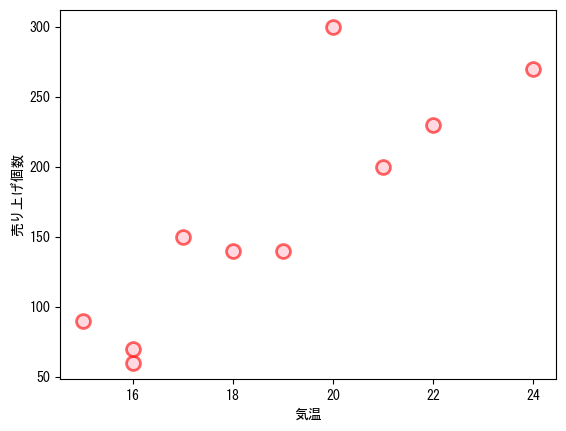

In [86]:
plt.scatter(df["気温"], df["売り上げ個数"], alpha=0.6, c="pink", s=100, edgecolors="red", linewidths=2, marker="o")
plt.xlabel("気温")
plt.ylabel("売り上げ個数")
plt.show()

In [88]:
fpath = os.path.join(DATA_DIR, "SAMPLE3.xlsx")
cof = pd.read_excel(fpath, sheet_name="Sheet1", index_col=0)

f = "売り上げ個数 ~ 気温"
res = smf.ols(f, cof).fit()
res.summary()

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 売り上げ個数   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     22.35
Date:                Tue, 02 Jul 2024   Prob (F-statistic):            0.00149
Time:                        15:54:03   Log-Likelihood:                -51.172
No. Observations:                  10   AIC:                             106.3
Df Residuals:                       8   BIC:                             106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -290.4639     97.396     -2.982      0.018    -515.059     -65.869
気温            24.2268      5.125      4.727      0.001      12.409      36.044
==============================================================================
Omnibus:                       12.889   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.170
Skew:                           1.673   Prob(JB):                       0.0457
Kurtosis:                       4.900   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
fpath = os.path.join(DATA_DIR, "SAMPLE3.xlsx")
cof = pd.read_excel(fpath, sheet_name="Sheet1", index_col=0)

f2 = "売り上げ個数 ~ 気温 + 来場者数	"
res2 = smf.ols(f2, cof).fit()
res2.summary()

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 売り上げ個数   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     43.32
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           0.000114
Time:                        16:01:55   Log-Likelihood:                -44.872
No. Observations:                  10   AIC:                             95.74
Df Residuals:                       7   BIC:                             96.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -202.9318     59.229     -3.426      0.011    -342.986     -62.877
気温            15.6302      3.563      4.387      0.003       7.206      24.054
来場者数           0.0341      0.008      4.205      0.004       0.015       0.053
==============================================================================
Omnibus:                        2.561   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.078
Skew:                          -0.379   Prob(JB):                        0.583
Kurtosis:                       1.581   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
fpath = os.path.join(DATA_DIR, "SAMPLE3.xlsx")
cof = pd.read_excel(fpath, sheet_name="Sheet2", index_col=0)

f2 = "売り上げ個数 ~ 気温 + 来場者数	"
res2 = smf.ols(f2, cof).fit()
res2.summary()

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 売り上げ個数   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     43.32
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           0.000114
Time:                        16:11:45   Log-Likelihood:               -0.69536
No. Observations:                  10   AIC:                             7.391
Df Residuals:                       7   BIC:                             8.298
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.551e-17      0.098  -5.66e-16      1.000      -0.232       0.232
気温             0.5536      0.126      4.387      0.003       0.255       0.852
来場者数           0.5306      0.126      4.205      0.004       0.232       0.829
==============================================================================
Omnibus:                        2.561   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.078
Skew:                          -0.379   Prob(JB):                        0.583
Kurtosis:                       1.581   Cond. No.                         1.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
res2.resid

1日目     0.293594
2日目     0.228449
3日目    -0.380386
4日目    -0.204273
5日目     0.250753
6日目     0.236765
7日目    -0.136209
8日目     0.183739
9日目    -0.055650
10日目   -0.416781
dtype: float64

## 課題

In [115]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [17]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

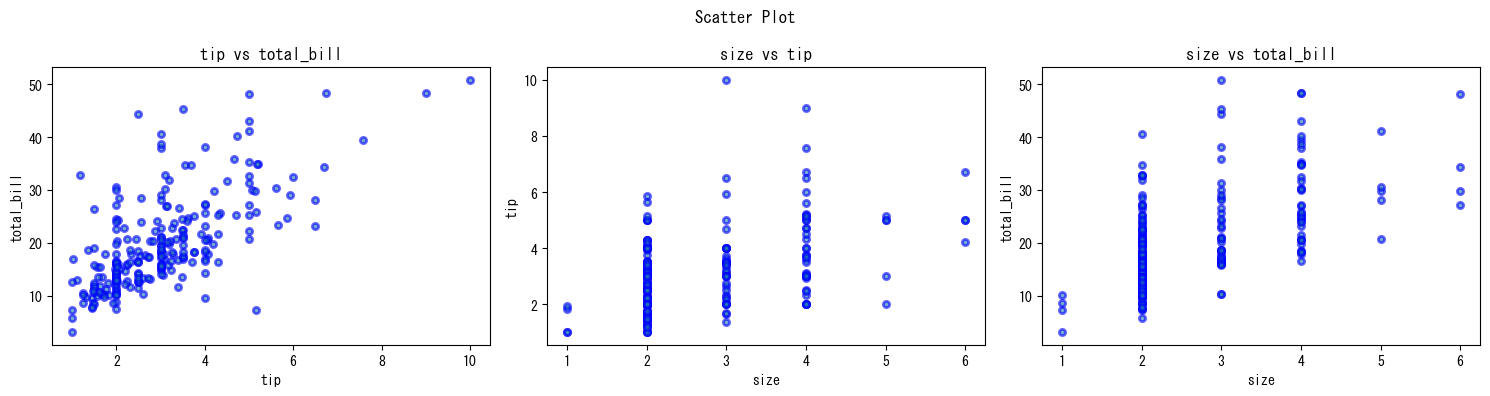

In [31]:
# 散布図
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(tips["tip"], tips["total_bill"], s=20, alpha=0.6, linewidths=2, edgecolors="b")
ax[1].scatter(tips["size"], tips["tip"], s=20, alpha=0.6, linewidths=2, edgecolors="b")
ax[2].scatter(tips["size"], tips["total_bill"], s=20, alpha=0.6, linewidths=2, edgecolors="b")

ax[0].set_title("tip vs total_bill")
ax[1].set_title("size vs tip")
ax[2].set_title("size vs total_bill")

ax[0].set_xlabel("tip")
ax[1].set_xlabel("size")
ax[2].set_xlabel("size")

ax[0].set_ylabel("total_bill")
ax[1].set_ylabel("tip")
ax[2].set_ylabel("total_bill")

plt.suptitle("Scatter Plot")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

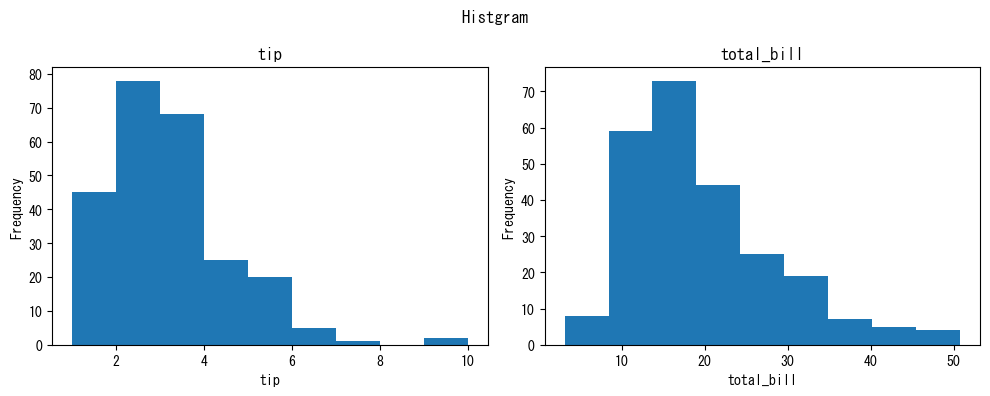

In [32]:
# ヒストグラム
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(tips["tip"], bins=9)
ax[1].hist(tips["total_bill"], bins=9)

ax[0].set_title("tip")
ax[1].set_title("total_bill")

ax[0].set_xlabel("tip")
ax[1].set_xlabel("total_bill")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.suptitle("Histgram")
plt.tight_layout()
plt.show


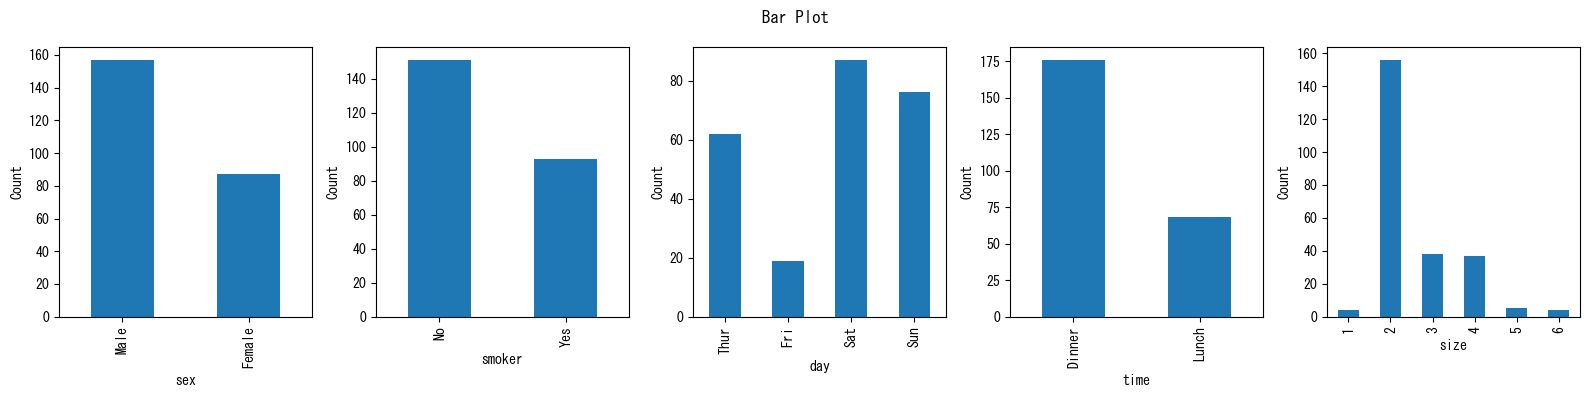

In [57]:
# 棒グラフ
fig, ax = plt.subplots(1, 5, figsize=(16, 4))

tips["sex"].value_counts().plot.bar(ax=ax[0])
tips["smoker"].value_counts().plot.bar(ax=ax[1])
tips["day"].value_counts().reindex(index=["Thur", "Fri", "Sat", "Sun"]).plot.bar(ax=ax[2])
tips["time"].value_counts().plot.bar(ax=ax[3])
tips["size"].value_counts().reindex(index=[1, 2, 3, 4, 5, 6]).plot.bar(ax=ax[4])

ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")
ax[2].set_ylabel("Count")
ax[3].set_ylabel("Count")
ax[4].set_ylabel("Count")

plt.suptitle("Barplot")
plt.tight_layout()
plt.show()

In [56]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

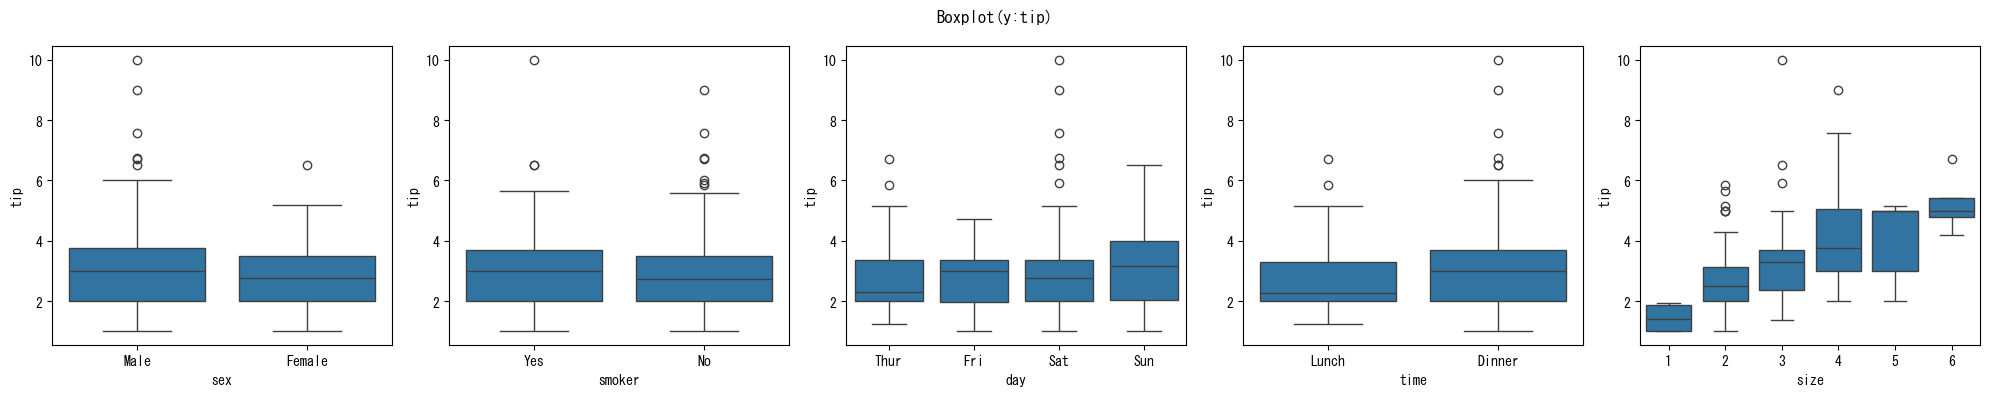

In [64]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
sns.boxplot(x="sex", y="tip", data=tips, ax=ax[0])
sns.boxplot(x="smoker", y="tip", data=tips, ax=ax[1])
sns.boxplot(x="day", y="tip", data=tips, ax=ax[2])
sns.boxplot(x="time", y="tip", data=tips, ax=ax[3])
sns.boxplot(x="size", y="tip", data=tips, ax=ax[4])

plt.suptitle("Boxplot(y:tip)")
plt.tight_layout()
plt.show()

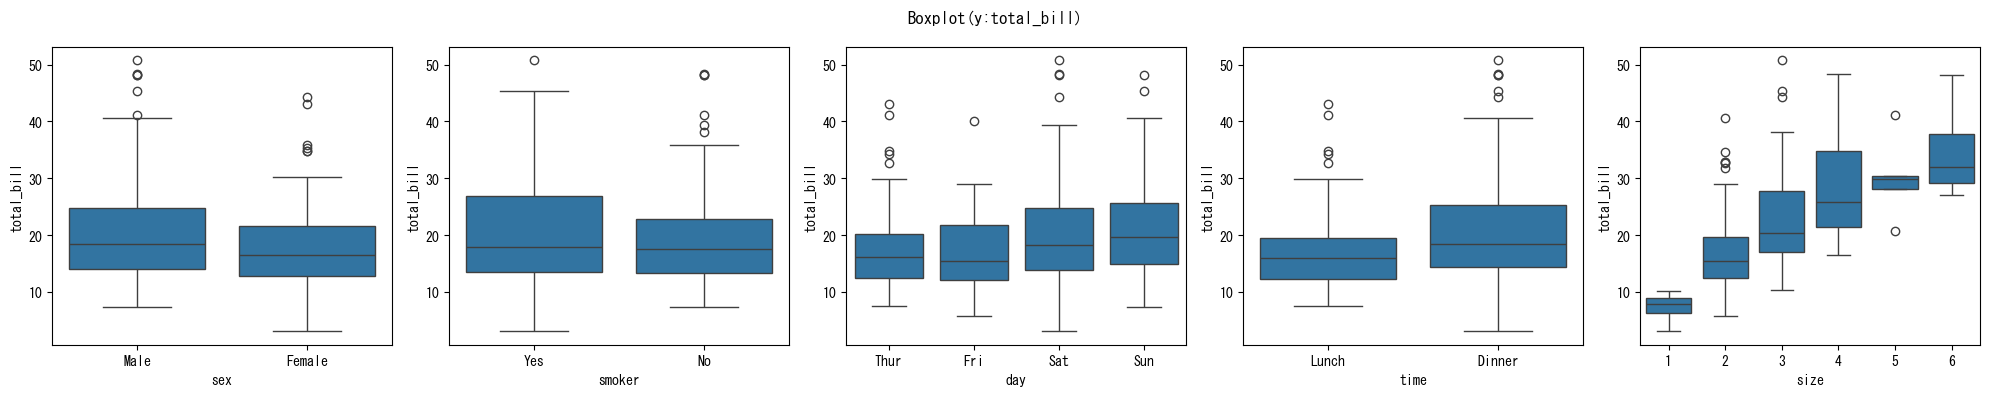

In [65]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
sns.boxplot(x="sex", y="total_bill", data=tips, ax=ax[0])
sns.boxplot(x="smoker", y="total_bill", data=tips, ax=ax[1])
sns.boxplot(x="day", y="total_bill", data=tips, ax=ax[2])
sns.boxplot(x="time", y="total_bill", data=tips, ax=ax[3])
sns.boxplot(x="size", y="total_bill", data=tips, ax=ax[4])

plt.suptitle("Boxplot(y:total_bill)")
plt.tight_layout()
plt.show()

In [70]:
# One-Hot-Encoding
tips["sex_bool"] = (tips["sex"] == "Male").astype(int)
tips["smoker_bool"] = (tips["smoker"] == "Yes").astype(int)
tips["Thur_bool"] = (tips["day"] == "Thur").astype(int)
tips["Fri_bool"] = (tips["day"] == "Fri").astype(int)
tips["Sat_bool"] = (tips["day"] == "Sat").astype(int)
tips["time_bool"] = (tips["time"] == "Dinner").astype(int)

<Axes: >

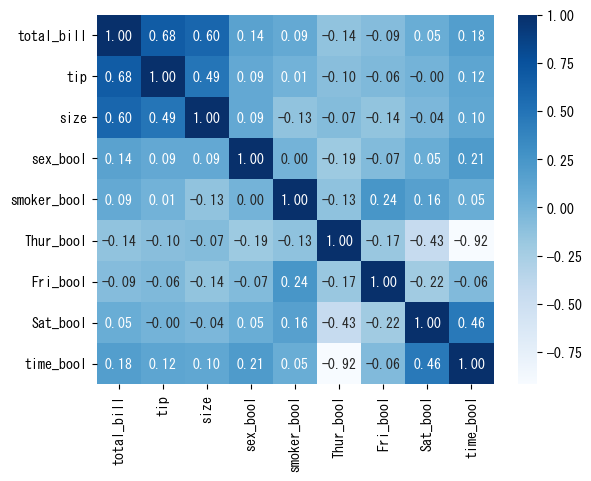

In [111]:
sns.heatmap(tips.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Blues", )

In [73]:
# 標準化なし
f = "tip ~ total_bill + size + sex_bool + smoker_bool + Thur_bool + Fri_bool + Sat_bool + time_bool"
res = smf.ols(f, tips).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.20e-28
Time:                        14:40:24   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8465      0.511      1.657      0.099      -0.160       1.853
total_bill      0.0945      0.010      9.841      0.000       0.076       0.113
size            0.1760      0.090      1.966      0.051      -0.000       0.352
sex_bool       -0.0324      0.142     -0.229      0.819      -0.311       0.247
smoker_bool    -0.0864      0.147     -0.589      0.556      -0.375       0.202
Thur_bool      -0.1368      0.472     -0.290      0.772      -1.066       0.793
Fri_bool        0.0255      0.321      0.079      0.937      -0.608       0.658
Sat_bool       -0.0960      0.166     -0.579      0.563      -0.423       0.231
time_bool      -0.0681      0.445     -0.153      0.878      -0.944       0.808
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
num_cols = ['total_bill', 'tip', 'size', 'sex_bool', 'smoker_bool', 'Thur_bool', 'Fri_bool', 'Sat_bool', 'time_bool']

In [79]:
tips[num_cols] = (tips[num_cols] - tips[num_cols].mean()) / tips[num_cols].std()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bool,smoker_bool,Thur_bool,Fri_bool,Sat_bool,time_bool
0,-0.314066,-1.436993,Female,No,Sun,Dinner,-0.598961,-1.340598,-0.783179,-0.582463,-0.289997,-0.742879,0.620307
1,-1.061054,-0.967217,Male,No,Sun,Dinner,0.452453,0.742879,-0.783179,-0.582463,-0.289997,-0.742879,0.620307
2,0.137497,0.362610,Male,No,Sun,Dinner,0.452453,0.742879,-0.783179,-0.582463,-0.289997,-0.742879,0.620307
3,0.437416,0.225291,Male,No,Sun,Dinner,-0.598961,0.742879,-0.783179,-0.582463,-0.289997,-0.742879,0.620307
4,0.539635,0.442111,Female,No,Sun,Dinner,1.503867,-1.340598,-0.783179,-0.582463,-0.289997,-0.742879,0.620307


In [114]:
# 標準化済み
f = "tip ~ total_bill + size"
res2 = smf.ols(f, tips).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           9.67e-34
Time:                        17:04:27   Log-Likelihood:                -268.75
No. Observations:                 244   AIC:                             543.5
Df Residuals:                     241   BIC:                             554.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.533e-16      0.047    5.4e-15      1.000      -0.092       0.092
total_bill     0.5965      0.059     10.172      0.000       0.481       0.712
size           0.1324      0.059      2.258      0.025       0.017       0.248
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         1.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
f = "tip ~ total_bill + size + sex_bool + smoker_bool + Thur_bool + Fri_bool + Sat_bool + time_bool"
res = smf.ols(f, tips).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.20e-28
Time:                        15:38:33   Log-Likelihood:                -268.25
No. Observations:                 244   AIC:                             554.5
Df Residuals:                     235   BIC:                             586.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.776e-16      0.047   5.86e-15      1.000      -0.093       0.093
total_bill      0.6079      0.062      9.841      0.000       0.486       0.730
size            0.1210      0.062      1.966      0.051      -0.000       0.242
sex_bool       -0.0113      0.049     -0.229      0.819      -0.108       0.086
smoker_bool    -0.0304      0.052     -0.589      0.556      -0.132       0.071
Thur_bool      -0.0431      0.149     -0.290      0.772      -0.336       0.250
Fri_bool        0.0049      0.062      0.079      0.937      -0.118       0.128
Sat_bool       -0.0333      0.058     -0.579      0.563      -0.147       0.080
time_bool      -0.0221      0.144     -0.153      0.878      -0.307       0.262
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         6.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""